In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df.shape

(15, 2)

In [6]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [7]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [8]:
df.shape

(15, 2)

In [9]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [10]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


### Here in the Chirps/Second min value 14.4 and max is 20.0 and temp has min val. of 69 and max 93

In [12]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower_thershold ", lower_limit)
    print("Upper_thershold ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Chirps/Second is 1.6999999999999993
Lower_thershold  12.9
Upper_thershold  19.699999999999996
Outlier is Presented In Chirps/Second


Interquartile Range of Ground Temperature is 10.0
Lower_thershold  58.400000000000006
Upper_thershold  98.4
Outlier is Not Presented In Ground Temperature




By here there is an upper outlier presented

In [13]:
def Outlier_Data_Points(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.empty: 
      print("No Outlier is Presented In",i )
    else:
      print("Outlier is Presented In " + i + "is")
      for j in outliers[i]:
        print(j)
      print("\n")
Outlier_Data_Points(df)

Outlier is Presented In Chirps/Secondis
20.0
19.8


No Outlier is Presented In Ground Temperature


## here 2 outlier presented on the data that not too far,And it may not affect our model the upper Thershold is 19.6

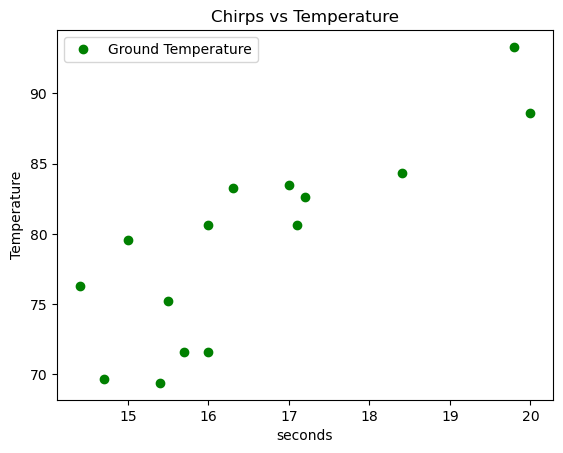

In [43]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o',c="g")
plt.title('Chirps vs Temperature')
plt.xlabel('seconds')
plt.ylabel('Temperature')
plt.show()

here there is linear relationship between feature and Target sec. incr temp. also incr. and let do the linear regression

In [17]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


# 1.find the L.R equation for this data?
###    y=m*x+c


In [16]:

X = df.loc[:, ['Chirps/Second']].values
y = df.loc[:, 'Ground Temperature'].values

from sklearn.model_selection import train_test_split                         #import the required function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
y_test

array([84.3, 71.6, 79.6, 75.2, 69.4])

In [18]:
X_train.shape,X_test.shape

((10, 1), (5, 1))

In [38]:
from sklearn.linear_model import LinearRegression          #importing all the required functions
regressor = LinearRegression()                             # spredicted score = m * hours + c  
"Syntax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)                            #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [39]:
C = regressor.intercept_ # c
C

24.887431501361974

In [21]:
M = regressor.coef_ # slope - m
M

array([3.33071623])

In [22]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([86.17261016, 77.17967633, 74.84817497, 76.51353309, 76.18046146])

In [23]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,84.3,86.172610
1,71.6,77.179676
2,79.6,74.848175
3,75.2,76.513533
4,69.4,76.180461


## consider that x = 19 equation is y= m*x+c

In [24]:
X=19
Y = M*(X)+C
print(Y)

[88.1710399]


# 2. Chart the original data and the equation on the chart.

In [13]:
#by the queation 1 taking X and y

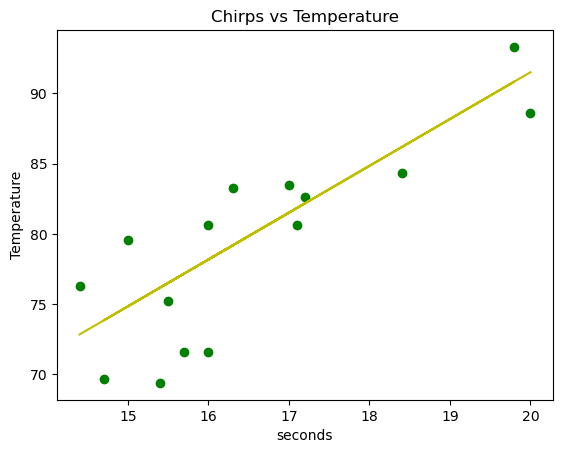

In [35]:
X = df.loc[:, ['Chirps/Second']].values
y = df.loc[:, 'Ground Temperature'].values

y_predi = regressor.predict(X)
plt.plot(X,y,"o",c="g")
plt.title('Chirps vs Temperature')
plt.xlabel('seconds')
plt.ylabel('Temperature')
plt.plot(X, y_predi,"y")

#  3.Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [85]:
from sklearn import metrics                              # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.5744337369498733


In [86]:
regressor.score(X_test,y_test)                           # another way to get the r^2 values

0.5744337369498733

# 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [42]:
# for m regressor.coef_
# for c regressor.intercept_

ground_temp = 95
expected_Y= M*(ground_temp)+C
expected_Y

array([341.30547348])

# 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [37]:
X = df.loc[:,["Chirps/Second"]].values
y = df.loc[:,"Ground Temperature"].values

from sklearn.linear_model import LinearRegression          #importing the required functions
regressor = LinearRegression() 
regressor.fit(X,y)

y_predic=regressor.predict(X)
y_predic

array([91.0554423, 77.4141503, 90.3733777, 85.5989255, 81.1655056,
       75.7089888, 72.9807304, 76.3910534, 75.3679565, 78.4372472,
       74.0038273, 81.5065379, 77.4141503, 80.8244733, 71.9576335])

In [41]:
#chirping at a rate of 18 chirps per second
chirp = 18
gr_temp_Y = M*(chirp)+C
gr_temp_Y

array([84.84032367])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [3]:
df = pd.read_fwf("brain_body.txt")

In [4]:
df                      #shape(62,2)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [5]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [6]:
df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [7]:
df.shape

(62, 2)

In [8]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [9]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


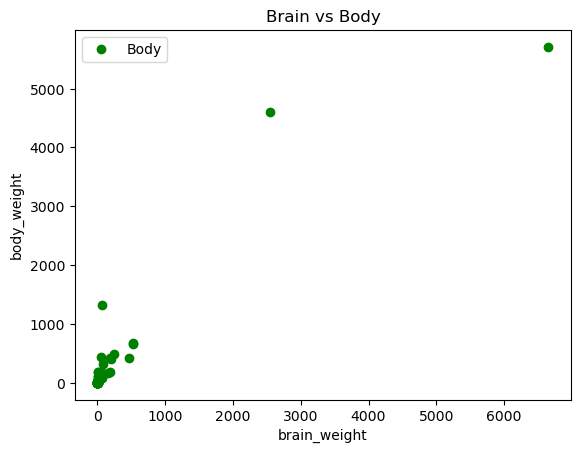

In [10]:
df.plot(x='Brain', y='Body', style='o',c="g")
plt.title('Brain vs Body')
plt.xlabel('brain_weight')
plt.ylabel('body_weight')
plt.legend()
plt.show()

# IQR and finding the lower and upper thershold

In [11]:
def outlier_presence(df):
    for i in df.keys():
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        print("Interquartile Range of " + i + " is", IQR)
        print("Lower_thershold ", lower_limit)
        print("Upper_thershold ", upper_limit)
        outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
        if outliers.shape[0] != 0:
            print("Outlier is Presented In",i )
            print("\n")
        else:
            print("Outlier is Not Presented In",i )
            print("\n")
  
outlier_presence(df)

Interquartile Range of Brain is 47.6025
Lower_thershold  -70.80375000000001
Upper_thershold  119.60625
Outlier is Presented In Brain


Interquartile Range of Body is 161.75
Lower_thershold  -238.375
Upper_thershold  408.625
Outlier is Presented In Body




In [12]:
def Outlier_Data_Points(df):
    for i in df.keys():
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
        if outliers.empty:
            print("No Outlier is Presented In",i )
        else:
            print("Outlier is Presented In " + i + "is")
            for j in outliers[i]:
                print(j)
            print("\n")
Outlier_Data_Points(df)

Outlier is Presented In Brainis
465.0
2547.0
187.1
521.0
529.0
207.0
6654.0
250.0
192.0
160.0


Outlier is Presented In Bodyis
423.0
4603.0
419.0
655.0
680.0
1320.0
5712.0
490.0
440.0




In [13]:
df.Brain = df.Brain.clip(-70.80, 119.60)            #clip the outlier inside the clip given limit the thershold will changed another method also having capping(refer)

In [14]:
df.Body = df.Body.clip(-238.3,408.6)

### Now outlier are cliped by using clip()


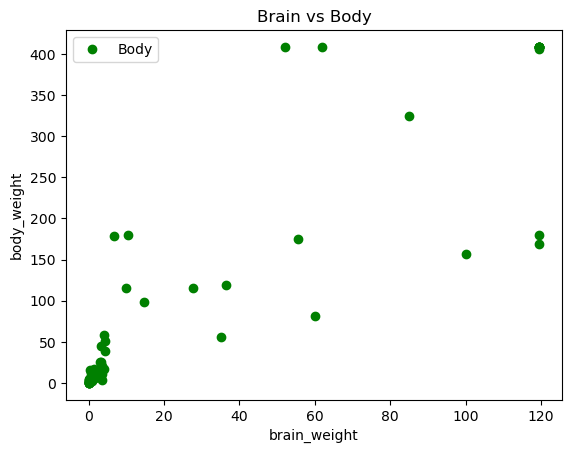

In [15]:
df.plot(x='Brain', y='Body', style='o',c="g")        
plt.title('Brain vs Body')
plt.xlabel('brain_weight')
plt.ylabel('body_weight')
plt.legend()
plt.show()

In [16]:
df.corr()

,Brain,Body
Brain,1.000000,0.888244
Body,0.888244,1.000000


In [17]:
from sklearn.model_selection import train_test_split
X = df.loc[:, ['Brain']].values 
y = df.loc[:, 'Body'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 6)

# 1. Find the linear regression equation for this data for brain weight to body weight.

### y=m*x+c 

In [18]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test) 
y_pred

array([354.61779999,  19.68275879,  26.30744394,  17.03853478,
        35.95490654,  44.99498863,  16.77298237, 354.61779999,
        17.5357393 , 173.53365575, 354.61779999,  20.69976803,
        26.91482446,  28.70871575,  58.63986252,  18.86350135,
        16.88033335,  16.91423365,  26.06731676])

In [20]:
New_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_data

,Actual,Predicted
0,408.60,354.617800
1,5.50,19.682759
2,44.50,26.307444
3,2.50,17.038535
4,179.00,35.954907
5,115.00,44.994989
6,0.25,16.772982
7,408.60,354.617800
8,1.90,17.535739
9,175.00,173.533656


In [21]:
print(regressor.intercept_) # c
print(regressor.coef_) # slope - m

16.744732115835646
[2.82502565]


# 2. Chart the original data and the equation on the chart.

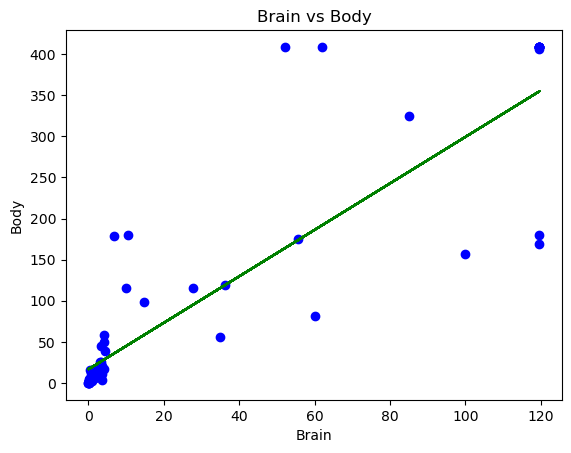

In [22]:
y_predi = regressor.predict(X)

plt.plot(X,y,"o",c="b")
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.plot(X, y_predi,"g")

# 3. Find the equation's  𝑅2  score (use the.score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [23]:
from sklearn import metrics                              # metrics will contain all the evaluation metrics  where random_State at 6
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9018508782193447


# R^2 value is 0.90 which is considered

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [32]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [33]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [34]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [35]:
df.shape

(52, 6)

In [36]:
df.drop_duplicates()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [37]:
df.shape

(52, 6)

In [38]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


## IQR to detect the outliers 

In [39]:
def outlier_presence(df):
    for i in df.keys():
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        print("Interquartile Range of " + i + " is", IQR)
        print("Lower_thershold ", lower_limit)
        print("Upper_thershold ", upper_limit)
        outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
        if outliers.shape[0] != 0:
            print("Outlier is Presented In",i )
            print("\n")
        else:
            print("Outlier is Not Presented In",i )
            print("\n")
  
outlier_presence(df)

Interquartile Range of Sex is 1.0
Lower_thershold  -1.5
Upper_thershold  2.5
Outlier is Not Presented In Sex


Interquartile Range of Rank is 2.0
Lower_thershold  -2.0
Upper_thershold  6.0
Outlier is Not Presented In Rank


Interquartile Range of Year is 8.0
Lower_thershold  -9.0
Upper_thershold  23.0
Outlier is Presented In Year


Interquartile Range of Degree is 1.0
Lower_thershold  -1.5
Upper_thershold  2.5
Outlier is Not Presented In Degree


Interquartile Range of YSdeg is 16.5
Lower_thershold  -18.0
Upper_thershold  48.0
Outlier is Not Presented In YSdeg


Interquartile Range of Salary is 9011.75
Lower_thershold  4729.125
Upper_thershold  40776.125
Outlier is Not Presented In Salary




In [40]:
def Outlier_Data_Points(df):
    for i in df.keys():
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
        if outliers.empty:
            print("No Outlier is Presented In",i )
        else:
            print("Outlier is Presented In " + i + "is")
            for j in outliers[i]:
                print(j)
            print("\n")
Outlier_Data_Points(df)

No Outlier is Presented In Sex
No Outlier is Presented In Rank
Outlier is Presented In Yearis
25


No Outlier is Presented In Degree
No Outlier is Presented In YSdeg
No Outlier is Presented In Salary


## At the third column 'year' there is an 1 outlier 25 which doesn't make an impact.

## Finding the relationship between features and the target

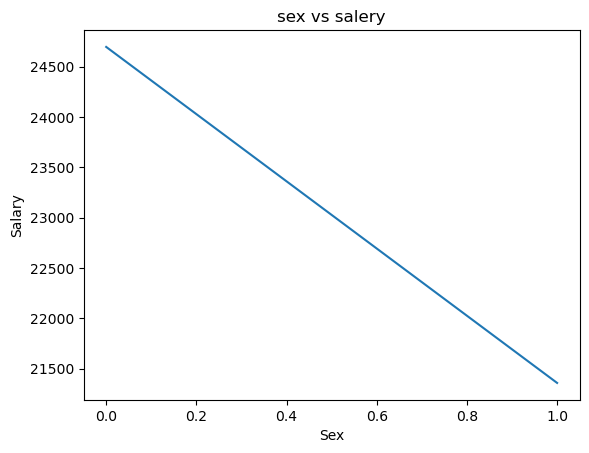

In [41]:
df.groupby("Sex")["Salary"].mean().plot()
plt.title("sex vs salery")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

In [42]:
df[["Sex","Salary"]].corr() 

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


## the sex_vs_Salary  corr which is having -0.2

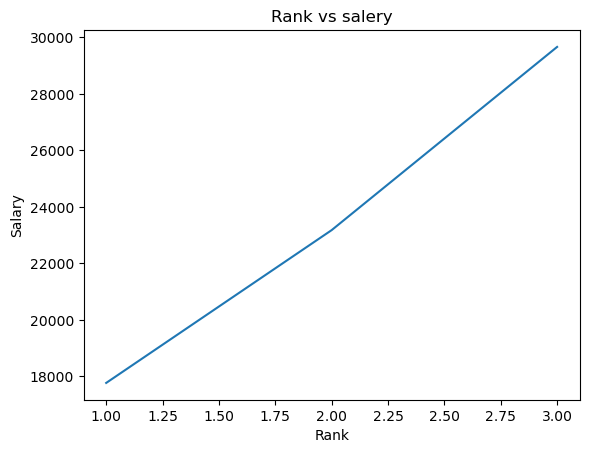

In [43]:
df.groupby("Rank")["Salary"].mean().plot()
plt.title("Rank vs salery")
plt.xlabel("Rank")
plt.ylabel("Salary")
plt.show()

In [44]:
df[["Rank","Salary"]].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


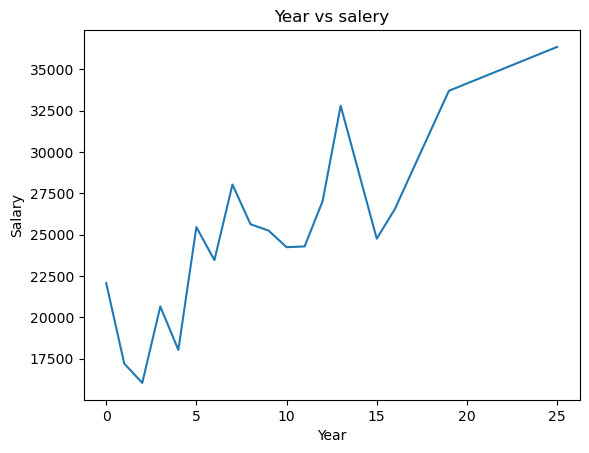

In [45]:
df.groupby("Year")["Salary"].mean().plot()
plt.title("Year vs salery")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.show()

In [46]:
df[["Year","Salary"]].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


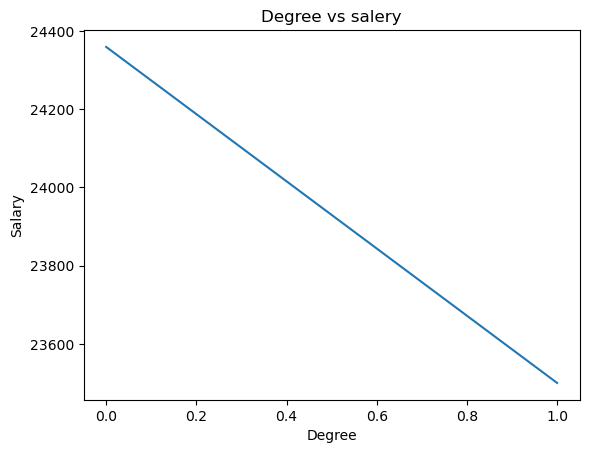

In [47]:
df.groupby("Degree")["Salary"].mean().plot()
plt.title("Degree vs salery")
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.show()

In [48]:
df[["Degree","Salary"]].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


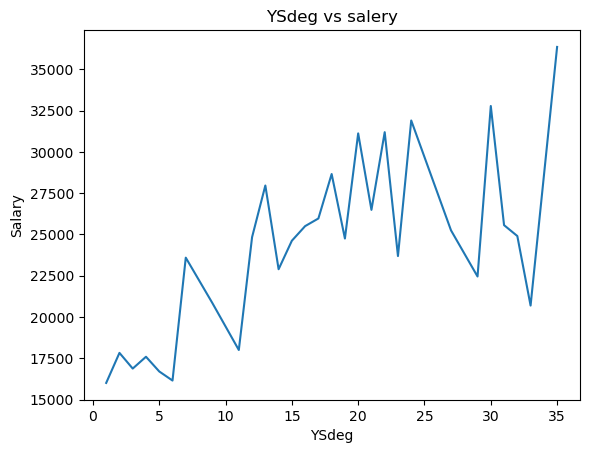

In [49]:
df.groupby("YSdeg")["Salary"].mean().plot()
plt.title("YSdeg vs salery")
plt.xlabel("YSdeg")
plt.ylabel("Salary")
plt.show()

In [50]:
df[["YSdeg","Salary"]].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


# 1.Find the linear regression equation for this data using columns 1-5 to column 6.

In [51]:
from sklearn.model_selection import train_test_split        

X = df.loc[:,["Sex", "Rank", "Year", "Degree", "YSdeg"]].values
y = df.loc[:,"Salary"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 12)


### Scaling the train

In [52]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled_data = scaler.transform(X_train) 
X_test_scaled_data = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LinearRegression          #importing all the required functions
regressor = LinearRegression() 

regressor.fit(X_train_scaled_data, y_train) 

LinearRegression()

In [54]:
y_predic = regressor.predict(X_test_scaled_data)                  # given the features of the test dataset, it will give the final predictions
y_predic

array([17256.5369674 , 16152.97015338, 23035.78279047, 31891.9215675 ,
       24046.98479269, 25733.23830539, 22710.69903296, 19840.50266756,
       17792.75790962, 17176.84253235, 18479.39125447, 22676.90365325,
       17743.68004512, 28127.88016855, 33228.78076947, 30543.48053116])

In [58]:
New_data = pd.DataFrame({'Actual': y_test,'predicted':y_predic})
New_data

,Actual,predicted
0,17600,17256.536967
1,16244,16152.970153
2,20525,23035.782790
3,31909,31891.921568
4,24832,24046.984793
5,24742,25733.238305
6,26182,22710.699033
7,18304,19840.502668
8,16150,17792.757910
9,16700,17176.842532


In [59]:
df_coff =pd.DataFrame(regressor.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"],columns = ["coefficient"])
df_coff

,coefficient
Sex,688.797588
Rank,4436.709829
Year,2475.768192
Degree,-437.860023
YSdeg,-760.416929


### coefficient for the rank has high

In [66]:
from sklearn import metrics                              # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_predic))

R2- SCORE: 0.9062452254927337


# 2.Find the selection of columns with the best  𝑅2  score.

In [67]:
def Selc_Col(df):
    for i in df.keys():
        if i != 'Salary':
            X = df.loc[:, [i]].values 
            y = df.loc[:, 'Salary'].values 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
            scaler = StandardScaler() 
            scaler.fit(X_train,y_train) 
            X_train_scaled = scaler.transform(X_train) 
            X_test_scaled = scaler.transform(X_test) 
            regressor = LinearRegression()   
            regressor.fit(X_train_scaled, y_train)
            y_pred = regressor.predict(X_test_scaled) 
            print('R2 - SCORE of ' + i + ' is: ', metrics.r2_score(y_test,y_pred))
N=Selc_Col(df)
N

R2 - SCORE of Sex is:  -0.012233465811496869
R2 - SCORE of Rank is:  0.6723218219021224
R2 - SCORE of Year is:  0.39359646731694975
R2 - SCORE of Degree is:  -0.05577210942642963
R2 - SCORE of YSdeg is:  0.3561736731232156


# R2- SCORE of the feature of Rank which having the high value score which make the best R2-Score

# 3.Report whether sex is a factor in salary.

## Answer : No it's not a Factor the Salary Prediction.Here the coefficient and R2- Score having the Low Value.